# Trigonometric fit using scipy and gradient descent

In [1]:
import numpy as np
import sklearn
from matplotlib import pyplot as plt 

from sklearn.metrics import mean_squared_error, r2_score

Link to scipy: <br>
https://scipy-lectures.org/intro/scipy/auto_examples/plot_curve_fit.html

To implement gradient descent in python: <br>
https://medium.com/coinmonks/implementation-of-gradient-descent-in-python-a43f160ec521


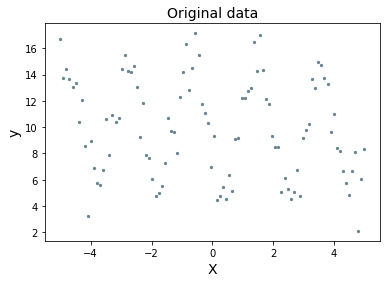

In [2]:
seed = 12345512
np.random.seed(seed)

n = 100
x_data = np.linspace(-5, 5, num= n)
y_data = 10 + 5 * np.cos(3 * x_data + 2) + 1.5 * np.random.normal(size=n)
plt.scatter(x_data, y_data, label='observations', color='#678491', s=5)
plt.ylabel('y', fontsize=14)
plt.xlabel('X', fontsize=14)
plt.title('Original data', fontsize=14);

## Fitting using scipy

In [4]:
from scipy import optimize
from IPython.display import display, Math

def test_func(x, dist, amp, omega, phi):
    return dist + amp * np.cos(omega * x + phi)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[1, 1, 2, 1])

print('Fitted parameters:')
display(Math('a_0={:.2f}, a_1={:.2f}, \\omega={:.2f}, \\phi={:.2f}'.format(*params)))
print('Original parameters:')
display(Math('a_0={:.2f}, a_1={:.2f}, \\omega={:.2f}, \\phi={:.2f}'.format(*[10.0, 5.0, 3.0, 2.0])))

Fitted parameters:


<IPython.core.display.Math object>

Original parameters:


<IPython.core.display.Math object>

<Figure size 432x288 with 0 Axes>

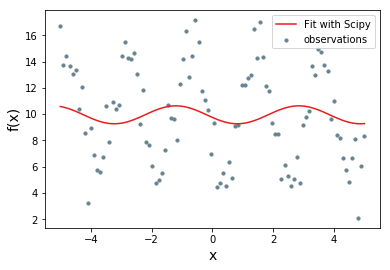

In [4]:
plt.figure(figsize=(6, 4))
fig, ax = plt.subplots()
ax.scatter(x_data, y_data, label='observations', color='#678491', s=10)
ax.plot(x_data, test_func(x_data, *params), label='Fit with Scipy', color='#EA1B1D')
ax.set_ylabel('f(x)', fontsize= 14)
ax.set_xlabel('x', fontsize= 14)
plt.legend(loc='best')
#ax.set_title('Fit using Scipy', fontsize=14)
plt.savefig('../images/scipy_optimize.png', bbox_inches="tight")

### Error function

In [5]:
def error_funct(X, y, dist, amp, omega, phi):
    return np.mean((test_func(X, dist, amp, omega, phi) - y)**2)

In [6]:
print('mse: ', error_funct(x_data, y_data, *params))

mse:  13.4478252747


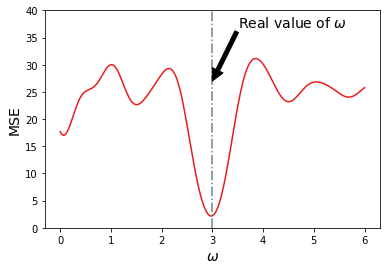

In [7]:
omegas = np.linspace(0, 6, 800)
dist, amp, phi = 10, 5, 2
errors = [error_funct(x_data, y_data, dist, amp, omega, phi) for omega in omegas]
fig, ax = plt.subplots()
ax.plot(omegas, errors, label='MSE of $f(x)$', color='#EA1B1D')
ax.set_ylabel('MSE', fontsize= 14)
ax.set_xlabel('$\omega$', fontsize= 14)
ax.set_ylim(0, 40)
ax.axvline(x=3, color='#678491', ls='-.')
ax.annotate('Real value of $\omega$', xy=(3, 27), xytext=(3.5, 37), arrowprops=dict(facecolor='black', shrink=50), fontsize=14)
plt.savefig('../images/Error_function_plot.png', bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

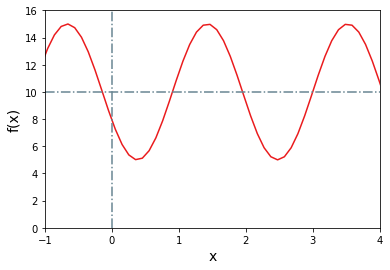

In [8]:
plt.figure(figsize=(6, 4))
fig, ax = plt.subplots()
ax.plot(x_data, test_func(x_data, 10, 5, 3, 2), label='Fit with Scipy', color='#EA1B1D')
ax.set_ylabel('f(x)', fontsize= 14)
ax.set_xlabel('x', fontsize= 14)
ax.set_ylim(0, 16)
ax.set_xlim(-1, 4)
ax.axhline(y=10, color='#678491', ls='-.')
ax.axvline(x=0, color='#678491', ls='-.')
#plt.legend(loc='best')
#ax.set_title('Fit using Scipy', fontsize=14)
plt.savefig('../images/cos_function.png', bbox_inches="tight")

## Gradient descent

In [9]:
def deriv_error_funct(w, X, y):
    '''
    The derivative of the error functiion. We use as loss function the MSE
    '''
    w_deriv = 2 * np.mean((np.cos(w*X) - y) * (-np.sin(w*X)) * X)
    return w_deriv

def error_funct(w, X, y):
    return np.mean((np.cos(w*X) - y)**2)

In [10]:
def step(w_init, precision, l_r, X, y, niters= 20):
    '''
    Description: This function takes in an initial or previous value for x, updates it based on 
    steps taken via the learning rate and outputs the most minimum value of x that reaches the precision satisfaction.
    
    Arguments:
    
    x_init - a starting value of x that will get updated based on the learning rate
    
    precision - a precision that determines the stop of the stepwise descent 
    
    l_r - the learning rate (size of each descent step)
    
    Output:
    
    1. Prints out the latest new value of x which equates to the minimum we are looking for
    2. Prints out the the number of x values which equates to the number of gradient descent steps
    3. Plots a first graph of the function with the gradient descent path
    4. Plots a second graph of the function with a zoomed in gradient descent path in the important area
    
    '''
    
    # create empty lists where the updated values of x and y wil be appended during each iteration
    
    w_list, err_list = [w_init], [error_funct(w_init, X, y)]

    i=0
    # keep looping until your desired precision
    while True:
        
        print (w_init)
        
        # get the derivation of the old value of x
        d_w = - deriv_error_funct(w_init, X, y)
        
        # get your new value of x by adding the previous, the multiplication of the derivative and the learning rate
        w_new = w_init + (l_r * d_w)
        
        # append the new value of x to a list of all x-s for later visualization of path
        w_list.append(w_new)
        
        # append the new value of y to a list of all y-s for later visualization of path
        err_list.append(error_funct(w_new, X, y))
        
        if abs(w_new - w_init) < precision:
            break
        
        # change the value of x
        w_init = w_new
        i+=1
        if (i== niters):
            break

    print ("Local minimum occurs at: "+ str(w_init))
    print ("Number of steps: " + str(len(w_list)))